# Bayesian blocks

[Bayesian block representations](https://arxiv.org/pdf/1207.5578.pdf) produce a piecewise-uniform density estimate with Bayesian underpinnings.

The [implementation in astropy](https://github.com/astropy/astropy/blob/master/astropy/stats/bayesian_blocks.py) is the best that we've found:

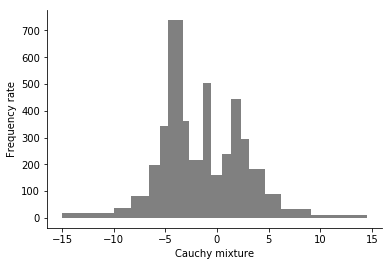

In [57]:
from astropy import stats as astats
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

def cauchy_mixture():
    ''' Simulate a mixture of Cauchy distributions

    Credit: https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/
    '''
    np.random.seed(0)
    x = np.concatenate([
        stats.cauchy(-5, 1.8).rvs(500),
        stats.cauchy(-4, 0.8).rvs(2000),
        stats.cauchy(-1, 0.3).rvs(500),
        stats.cauchy(2, 0.8).rvs(1000),
        stats.cauchy(4, 1.5).rvs(500)
    ])
    x = x[(x > -15) & (x < 15)]
    return x

def plot_blocks(blocks, name=None, return_plt=True):
    assert isinstance(blocks, tuple)
    assert len(blocks) == 2
    counts = blocks[0]
    bins = blocks[1]
    assert len(bins) == len(counts) + 1
    # Set up plot
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Frequency rate')
    if name is not None:
        ax.set_xlabel(name)
    else:
        ax.set_xlabel('x')
    widths = np.diff(bins)
    rates = counts/widths
    # Plot
    ax.fill_between(bins.repeat(2)[1:-1], rates.repeat(2), facecolor='grey')
    if return_plt:
        return ax

x = cauchy_mixture()
blocks = astats.histogram(x, bins='blocks')
_ = plot_blocks(blocks, 'Cauchy mixture')